In [1]:
from github import plot


import time
import json
import requests
import numpy as np
import pandas as pd

import requests
from requests.auth import HTTPBasicAuth

from github.api import Config

import pandas as pd

In [2]:
conf = Config()

In [3]:
user_df = pd.read_csv(conf.getUserPath())
repos_df = pd.read_csv(conf.getRepoPath())
commits_df = pd.read_csv(conf.getCommitPath())
lang_df = pd.read_csv(conf.getLanguagePath())

## Analisys

In [4]:
repos = repos_df
commits = commits_df

In [5]:
plot.show(repos, commits)

Total repos till date: 31
Total commits till date: 229
Total starts till date: 29
Total Watchers till date: 29


In [6]:
commits_count = plot.count_commit(repos, commits)
repos = pd.merge(repos, commits_count, on = 'Id')

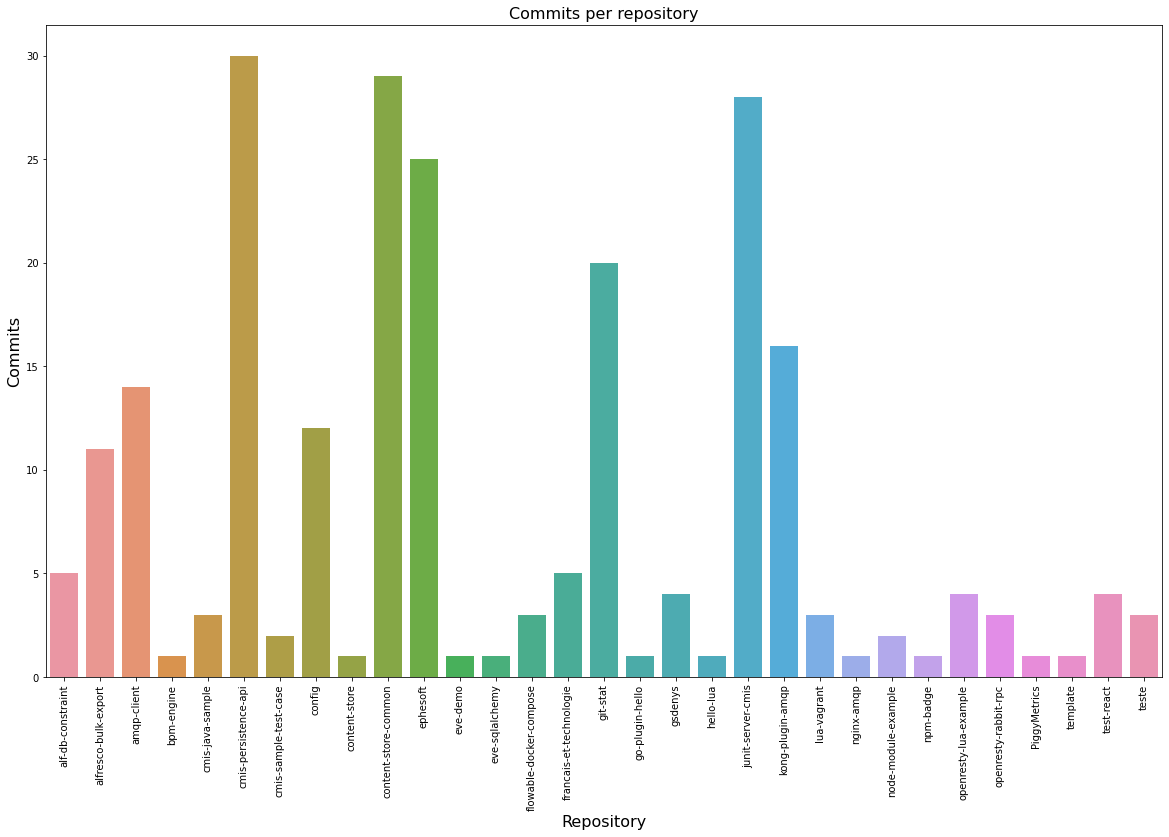

In [7]:
plot.draw(repos['Name'], repos['Commits count'], "Repository", "Commits", "Commits per repository")

In [8]:
commits['Year'] = commits['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits.groupby('Year').count()['Commit Id']

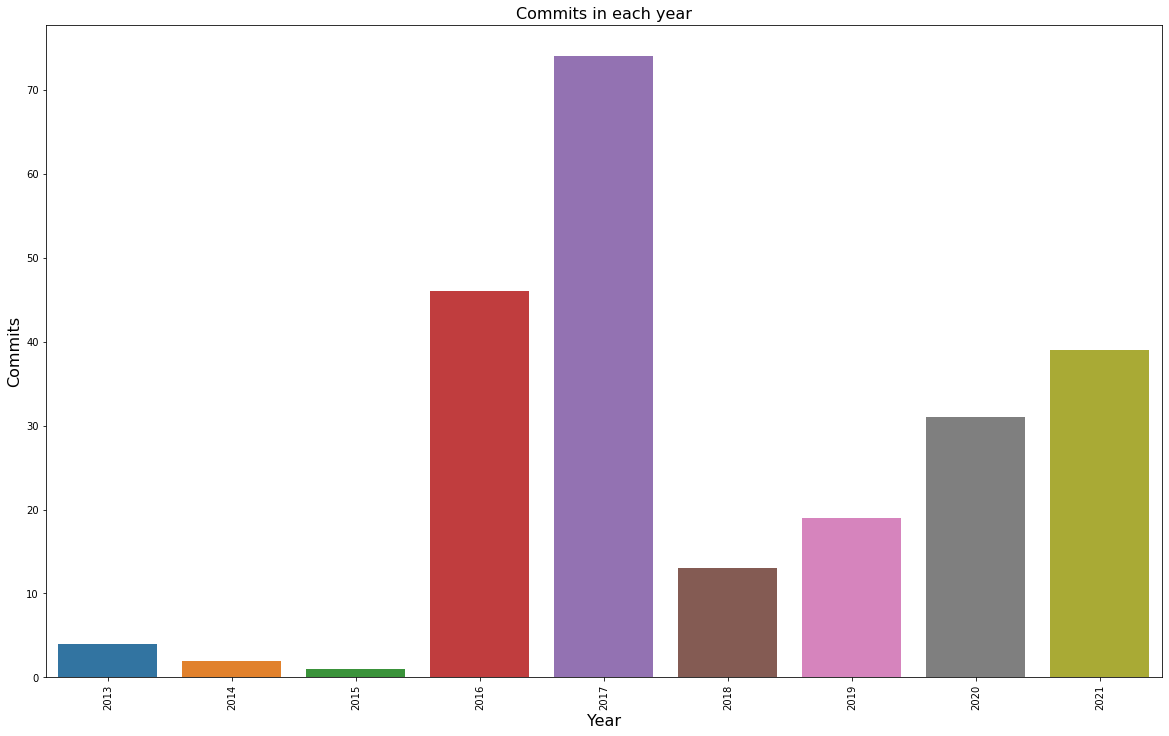

In [9]:
plot.draw(yearly_stats.index, yearly_stats.values, "Year", "Commits", "Commits in each year")

In [10]:
yearly_stats = yearly_stats.reset_index()
row_max = yearly_stats['Commit Id'].argmax()
year_max = yearly_stats['Year'][row_max]


commits['Month'] = commits['Date'].apply(lambda x: x.split('-')[1])
monthly_stats = commits[commits['Year'] == year_max].groupby('Month').count()['Commit Id']

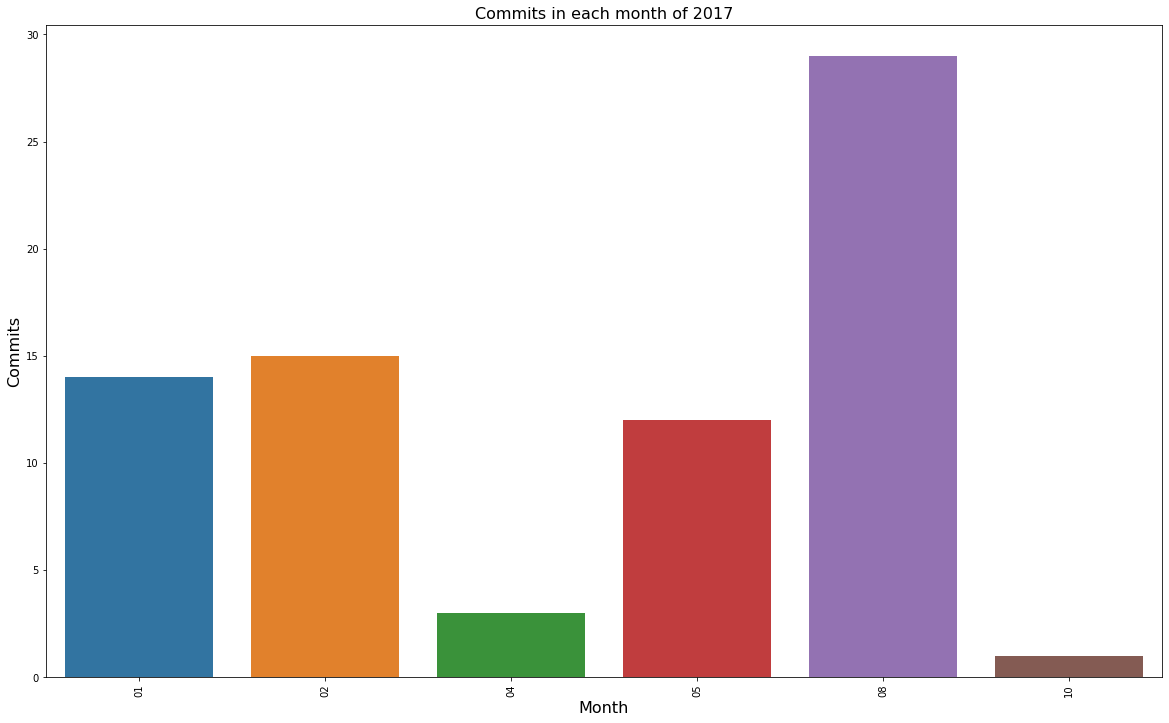

In [11]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', '07': 'July', '08': 'Autgust', '09': 'September','10': 'October', '11':'November', '12': 'Dezember'}
    
plot.draw(
    monthly_stats.index, 
    monthly_stats.values, 
    "Month", 
    "Commits", 
    "Commits in each month of " + year_max
)


In [12]:
monthly_stats = monthly_stats.reset_index()
row_max = monthly_stats['Commit Id'].argmax()
month_max = monthly_stats['Month'][row_max]

commits['Date only'] = pd.to_datetime(commits['Date'].apply(lambda date: date.split('T')[0]))
commit_stats = commits[(commits['Year'] == year_max)
                       & (commits['Month'] == month_max)]['Date only'].value_counts().sort_index()

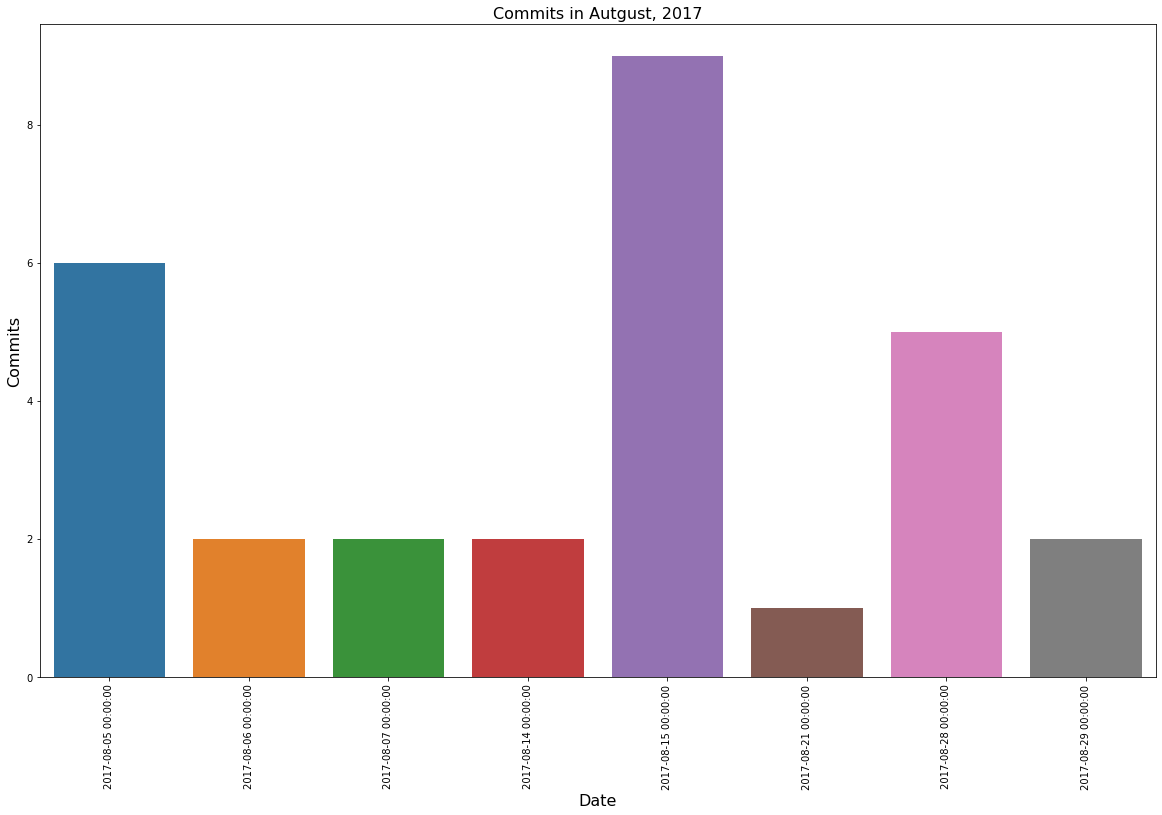

In [13]:
plot.draw(
    commit_stats.index, 
    commit_stats.values, 
    "Date", 
    "Commits", 
    "Commits in "+ month_mapper[month_max] +", " + year_max
)

## Language

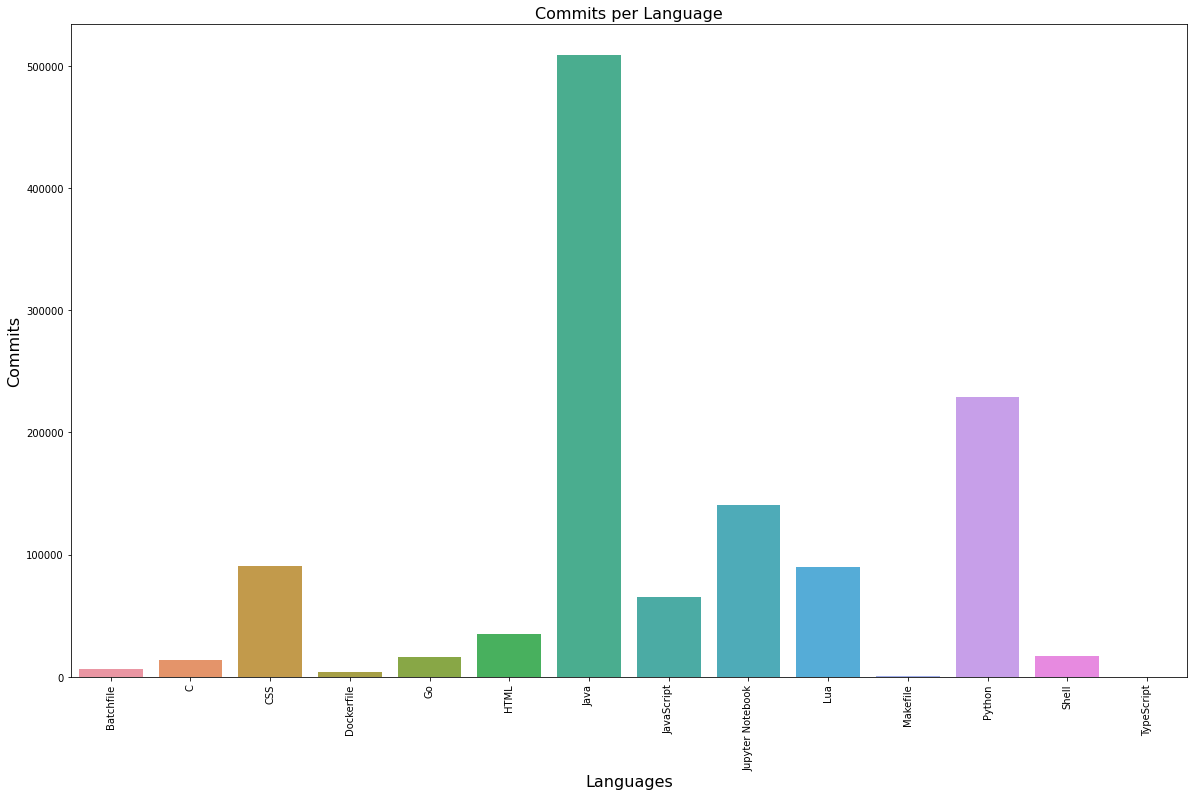

In [14]:
l = lang_df.groupby("Language").sum()

plot.draw(
    l["Repo Id"].index, 
    l["Size"].values, 
    "Languages", 
    "Commits", 
    "Commits per Language"
)